# Содержание #
<div>
    <ol>
        <li>
            <a href="#project">Проект "Спрос на рейсы авиакомпании"</a>
        </li>
        <li>
            <a href="#import_libs">Импорт библиотек</a>
        </li>
        <li>
            <a href="#data">Загрузка/предобработка данных</a>
        </li>
        <ul>
            <li>
                <a href="#data_preview">Предварительный осмотр данных</a>
            </li>
            <li>
                <a href="#data_type">Изменение типов данных</a>
            </li>
        </ul>
        <li>
            <a href="#analytics">Аналитика</a>
        </li>
        <ul>
            <li>
                <a href="#analytics_top_10_city">Топ 10 городов по количеству рейсов</a>
            </li>
            <li>
                <a href="#analytics_models_count">График "Модели самолётов и количество рейсов"</a>
            </li>
            <li>
                <a href="#analytics_city_count">График "Города и количество рейсов"</a>
            </li>
            <li>
                <a href="#analytics_top_10_city_count">График "Топ-10 городов и количество рейсов"</a>
            </li>
        </ul>
    </ol>
</div>

<a id='import_libs'></a>
# Импорт библиотек #

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display

pd.options.mode.chained_assignment = None

<a id='data'></a>
# Загрузка/предобработка данных #

<a id='data_preview'></a>
## Предварительный осмотр данных ##

In [2]:
df_model_flight = pd.read_csv(filepath_or_buffer='datasets/query_1.csv')
df_city_flight = pd.read_csv(filepath_or_buffer='datasets/query_3.csv')

In [3]:
df_model_flight.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [4]:
df_model_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [5]:
display(df_model_flight)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [6]:
display(df_model_flight.model.unique())

array(['Airbus A319-100', 'Airbus A321-200', 'Boeing 737-300',
       'Boeing 767-300', 'Boeing 777-300', 'Bombardier CRJ-200',
       'Cessna 208 Caravan', 'Sukhoi SuperJet-100'], dtype=object)

In [7]:
df_city_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [8]:
df_city_flight.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


In [9]:
display(df_city_flight)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [10]:
display(df_city_flight.city.unique())

array(['Абакан', 'Анадырь', 'Анапа', 'Архангельск', 'Астрахань',
       'Барнаул', 'Белгород', 'Белоярский', 'Благовещенск', 'Братск',
       'Брянск', 'Бугульма', 'Владивосток', 'Владикавказ', 'Волгоград',
       'Воркута', 'Воронеж', 'Геленджик', 'Горно-Алтайск', 'Грозный',
       'Екатеринбург', 'Иваново', 'Ижевск', 'Иркутск', 'Йошкар-Ола',
       'Казань', 'Калининград', 'Калуга', 'Кемерово', 'Киров', 'Когалым',
       'Комсомольск-на-Амуре', 'Краснодар', 'Красноярск', 'Курган',
       'Курск', 'Кызыл', 'Липецк', 'Магадан', 'Магнитогорск', 'Махачкала',
       'Минеральные Воды', 'Мирный', 'Москва', 'Мурманск', 'Надым',
       'Нальчик', 'Нарьян-Мар', 'Нерюнгри', 'Нефтеюганск',
       'Нижневартовск', 'Нижнекамск', 'Нижний Новгород', 'Новокузнецк',
       'Новосибирск', 'Новый Уренгой', 'Норильск', 'Ноябрьск', 'Нягань',
       'Омск', 'Оренбург', 'Орск', 'Пенза', 'Пермь', 'Петрозаводск',
       'Петропавловск-Камчатский', 'Псков', 'Ростов-на-Дону', 'Салехард',
       'Самара', 'Санк

## Итоги предварительного осмотра ##
1. пропущенные значения отсутствуют
2. df_model_flight['model'] - изменить тип данных на категориальный
3. df_city_flight['city'] - изменить тип данных на категориальный

<a id='data_type'></a>
## Изменение типов данных ##

In [11]:
df_model_flight['model'] = df_model_flight['model'].astype('category')
df_city_flight['city'] = df_city_flight['city'].astype('category')

<a id='analytics'></a>
# Аналитика #

<a id='analytics_top_10_city'></a>
## Топ 10 городов по количеству рейсов ##

In [12]:
df_top_city_flight =  df_city_flight.sort_values(by='average_flights', ascending=False).head(10)
display(df_top_city_flight)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


<a id='analytics_models_count'></a>
## График "Модели самолётов и количество рейсов" ##

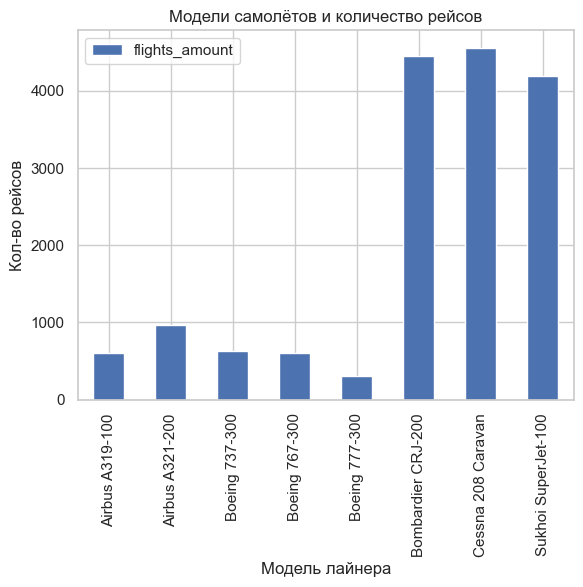

In [16]:
df_model_flight.pivot_table(index='model', values='flights_amount').plot(kind='bar', grid=True)
plt.title('Модели самолётов и количество рейсов')
plt.xlabel("Модель лайнера")
plt.ylabel("Кол-во рейсов")
plt.show()

## Вывод ##
1. Самым популярным лайнером является "Cesssna 208 Caravan" - самолет малой вместимости(до 13 пассажиров), малой дальности
    * Возможные причины:
        - малая вместимость - необходимо больше полетов для перевозки количества пассажиров сопоставимого со ближнемагистральными/среднемагистральными лайнерами.
        - стоимость полета:
            * используется турбовинтовая силовая установка(далее СУ). более экономичен по сравнению с турбореактивными СУ.
            * низкая стоимость обслуживания.
            * требования к инфраструктуре аэропорта минимальны.
            * возможность посадки на грунтовые полосы.
2. Второе место занимает "Bombardier SRJ-200" - 50-ти местный турбореактивный реагиональный лайнер
    * Возможные причины:
        - большое кол-во самолетов в парке региональных авиакомпаний. Связано с относительной дешевизной данного самолета на вторичном рынке - самолеты выкуплены у лизинговых компаний.
3. На третьем месте расположился "Sukhoi SuperJet 100" - турбореактивный, ближнемагистральный лайнер.
    * Возможные причины:
        - импортозамещение при поддержке государства

<a id='analytics_city_count'></a>
## График "Города и количество рейсов" ##

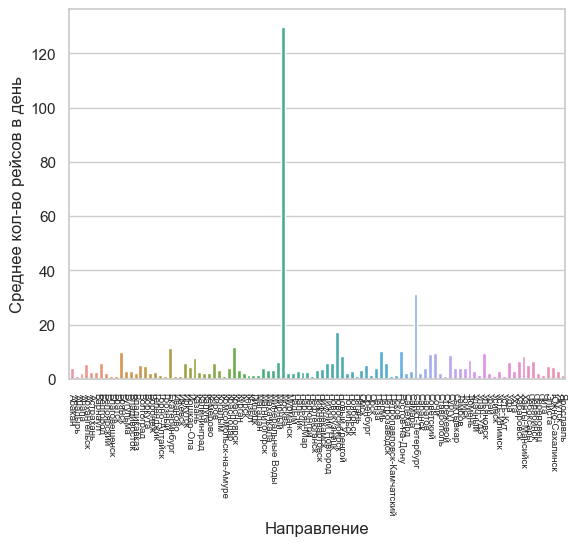

<Figure size 5000x5000 with 0 Axes>

In [14]:
sns.set_theme(style='whitegrid')
ax = sns.barplot(data=df_city_flight,
                 x='city',
                 y='average_flights')

ax.set(xlabel='Направление',
       ylabel='Среднее кол-во рейсов в день')

ax.tick_params(axis='x', rotation=-90)
ax.set_xticklabels(labels=ax.get_xticklabels(), size=7)
plt.figure(figsize=(50,50))
plt.show()

## Вывод ##
Распределение количества рейсов объясняется звездообразной организацией авиаперевозок.
Авиаперевозки организованы на основе использования узловых аэропортов(аэрохабов) -  это аэропорт, используемый авиакомпаниями как пункт пересадки пассажиров и имеющий высокий процент стыковочных рейсов.
Список городов с узловыми аэропортами РФ:
1. Москва и Московская обл.
2. Санкт-Петербург
3. Екатеринбург
4. Новосибирск
5. Краснодар
6. Сочи
7. Уфа
8. Красноярск
9. Самара
10. Ростовна-Дону
11. Хабаровск
12. Владивосток
13. Казань
14. Пермь
15. Иркутск
16. Минеральные Воды
17. Тюмень
18. Калининград
19. Якутск
20. Южно-Сахалинск

<a id='analytics_top_10_city_count'></a>
## График "Топ-10 городов и количество рейсов" ##

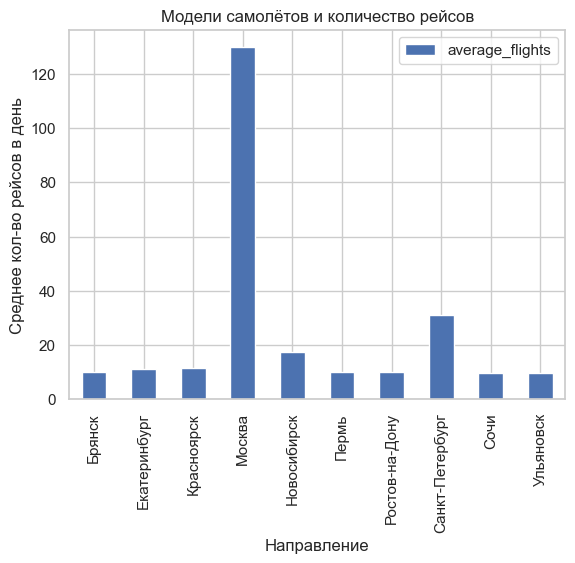

In [15]:
df_top_city_flight.pivot_table(index='city', values='average_flights').plot(kind='bar', grid=True)
plt.title('Модели самолётов и количество рейсов')
plt.xlabel("Направление")
plt.ylabel("Среднее кол-во рейсов в день")
plt.show()

## Вывод ##
Наибольшее количество рейсов в целом совпадает со списком городов с узловыми аэропортами.
    * Исключение составляют города:
        - Ульяновск
        - Брянск
    * Возможные причины:
        -- в 2018 году аэропорты указанных городов имели статус узловых
        -- высокая степень пассажироперевозок средствами малой авиации

# Вывод #
Выявить связь спроса пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали, на основе предоставленных данных не представляется возможным.